This coursework relates to the Hopfield network. We were provided with a programme that contains a function for converting an 11-component vector of 1s and -1s into an old-fashioned seven-segment digit and a number: The first seven digits correspond to the seven-segment display. The remaining four code for the number in a sort of binary where the zeros have been replaced with -1. It also contains three patterns: one, three and six.

The goal of this coursework is to the programme provided to include a hopfield network to store these three patterns using the formula for w_ij when i != j

In the code there are also two test patterns, the programme should update these synchonously until convergence and print out the patterns at each iteration.

In summary:
- Create a weight matrix of w_ij.
- Fix the weight values to store the three patterns
- Write a function to evolve the network according to the McCulloch Pitts formula: this should be done synchronously so all the nodes are updated at each timestep.
- For each of the two test patterns, evolve the patterns until they stop changing, printing the patterna at each step.

In [1]:
from math import *
import numpy as np
from matplotlib import pyplot as plt
import random
import itertools
from submission import *

In [2]:
def seven_segment(pattern):
    
    def to_bool(a):
        if a==1:
            return True
        return False
    
    def hor(d):
        if d:
            print(" _ ")
        else:
            print("   ")
            
    def vert(d1, d2, d3):
        word = ""
        
        if d1:
            word = "|"
        else:
            word = " "
        
        if d3:
            word += "_"
        else:
            word += " "
        
        if d2:
            word += "|"
        else:
            word += " "
        
        
        print(word)
        
    pattern_b = list(map(to_bool,pattern))
    
    hor(pattern_b[0])
    vert(pattern_b[1], pattern_b[2], pattern_b[3])
    vert(pattern_b[4], pattern_b[5], pattern_b[6])
    
    number = 0
    
    for i in range(0,4):
        if pattern_b[7+i]:
            number += pow(2,i)
    print(int(number))
    
submission=Submission("james_oreilly")
submission.header("James O'Reilly")

    
six = [1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1]
three = [1, -1, 1, 1, -1, 1, 1, 1, 1, -1, -1]
one = [-1, -1, 1, -1, -1, 1, -1, 1, -1, -1, -1]  #these are lists, NOT ARRAYS

seven_segment(three)
seven_segment(six)
seven_segment(one)

 _ 
 _|
 _|
3
 _ 
|_ 
|_|
6
   
  |
  |
1


In [3]:
#input for each neuron is the weighted sum of all the other inputs. To do this we first need a weight matrix.
#This will be a zero-diagonal symmetric matrix

def weightMatrix(a, b, c):
    shape = (11, 11)
    W = np.zeros(shape)
    for i in range(11):
        for j in range(11):
            if i != j:
                W[i, j] = 1/3 * (a[i]*a[j] + b[i]*b[j] + c[i]*c[j])
    return W

In [4]:
weight_matrix = weightMatrix(one, three, six)

submission.section("Weight matrix")
submission.matrix_print("W",weight_matrix)#

In [5]:
#defining a step function for the individual neurons
def stepFunction(value):
    if value < 0:
        return -1
    elif value >= 0:
        return 1

In [6]:
threshold = 0

#given a state, update the state using the weight matrix
def stateUpdate(vector, weights):
    newVector = [0,0,0,0,0,0,0,0,0,0,0]
    for i in range(11):
        summation = 0
        for j in range(11):
            if i!=j:
                summation += (vector[j] * weights[i,j]) - threshold
        newVector[i] = stepFunction(summation)
    return newVector

In [7]:
#defining an energy function that decreases as the state converges
def energy(vector, weights):
    sum = 0
    for i in range(11):
        for j in range(11):
            sum += vector[i] * weights[i,j] * vector[j]
    energy = -1/2 * sum
    energy = round(energy,1)
    return energy

In [8]:
def hopRunfield(vector, weights):
    attractorStates = []
    unstableList = []
    energyList = []
    stateList = []
    stateList.append(vector)
    submission.seven_segment(vector)
    submission.print_number(energy(vector, weights))
    energyList.append(energy(vector, weights))
    newVector = stateUpdate(vector, weights)
    toContinue = True
    
    while (toContinue):
        if newVector not in stateList:
            submission.seven_segment(newVector)
            submission.print_number(energy(newVector, weights))
            vector = newVector
            newVector = stateUpdate(vector, weights)
            energyList.append(energy(vector, weights))
            stateList.append(vector)
            if vector not in attractorStates:
                attractorStates.append(vector)
        
        elif (newVector in stateList and stateList[len(stateList) - 2] == newVector):
            unstableList.append(stateList[len(stateList) - 2])
            unstableList.append(stateList[len(stateList) - 1])
            print("unstable attractor states found after {0} iterations.".format(len(stateList)-1))
            print("List of States: {0}".format(stateList))
            print("Attractor States: {0} , {1} ".format(stateList[len(stateList) - 2], stateList[len(stateList) - 1]))
            print("List of energies at each iteration: {0}".format(energyList))
            seven_segment(stateList[len(stateList) - 2])
            seven_segment(stateList[len(stateList) - 1])
            plt.xlabel("Iterations")
            plt.ylabel("Energy")
            plt.plot(energyList)
            plt.show()
            return ((stateList[len(stateList) - 2]), (stateList[len(stateList) - 1]))
        
        elif (newVector in stateList and stateList[len(stateList) - 1] == newVector):
            print("Attractor found after {0} iterations.".format(len(stateList)-1))
            print("List of States: {0}".format(stateList))
            print("Attractor State: {0}".format(vector))
            print("List of energies at each iteration: {0}".format(energyList))
            seven_segment(vector)
            plt.xlabel("Iterations")
            plt.ylabel("Energy")
            plt.plot(energyList)
            plt.show()
            return newVector

In [9]:
print("test1")
submission.section("Test 1")

test1=[1,-1,1,1,-1,1,1,-1,-1,-1,-1]
seven_segment(test1)

submission.qquad()

##this prints a space
submission.qquad()

test1
 _ 
 _|
 _|
0


Attractor found after 1 iterations.
List of States: [[1, -1, 1, 1, -1, 1, 1, -1, -1, -1, -1], [1, -1, 1, 1, -1, 1, 1, 1, 1, -1, -1]]
Attractor State: [1, -1, 1, 1, -1, 1, 1, 1, 1, -1, -1]
List of energies at each iteration: [-4.2999999999999998, -16.300000000000001]
 _ 
 _|
 _|
3


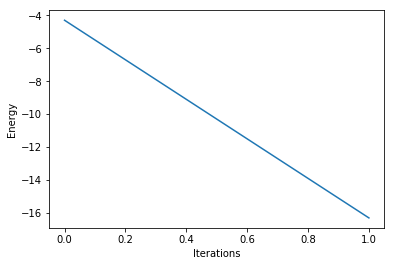

[1, -1, 1, 1, -1, 1, 1, 1, 1, -1, -1]

In [10]:
hopRunfield(test1, weight_matrix)

In [11]:
print("test2")
submission.section("Test 2")

test2 =[1,1,1,1,1,1,1,-1,-1,-1,-1]

energy2 = energy(test2, weight_matrix)

submission.qquad()

##this prints a space
submission.qquad()

test2


Attractor found after 3 iterations.
List of States: [[1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1], [1, -1, -1, 1, -1, 1, 1, 1, 1, 1, -1], [1, 1, 1, 1, 1, 1, 1, -1, 1, -1, -1], [1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1]]
Attractor State: [1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1]
List of energies at each iteration: [-0.29999999999999999, -7.0, -8.3000000000000007, -23.0]
 _ 
|_ 
|_|
6


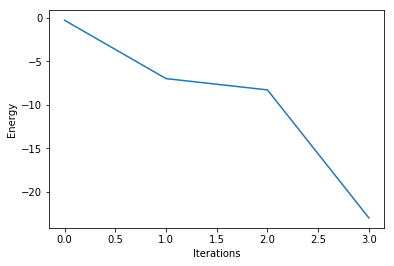

[1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1]

In [12]:
hopRunfield(test2, weight_matrix)

In [13]:
submission.bottomer()

We now want to:
- find any other minima (attractor states)
- investigate the frequency with which initial configurations fall into these attractor states
- distinguish between flippy and non-flippy attractor states
- find the configuration that takes longest to converge
- call seven_segment on these attractor states and see what they look like

Need to define a function that returns all possible initial configurations.

In [14]:
vectors2048 = list(itertools.product([-1, 1], repeat=11))

In [15]:
#for i in range(2048):
    #x = hopRunfield(list(vectors2048[i]), weight_matrix)

#print(list(vectors2048[0]))
#hopRunfield(list(itertools.chain.from_iterable(vectors2048)), W)

NameError: name 'W' is not defined